In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# esta la funcion de apriori
from apyori import apriori

%matplotlib notebook


In [12]:
df = pd.read_csv("retail_dataset.csv")
df.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [28]:
items = df["0"].unique() # entrega items presentes
items

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

In [29]:
df.describe(include="all")

,0,1,2,3,4,5,6
count,315,285,245,187,133,71,41
unique,9,9,9,9,9,9,9
top,Bread,Meat,Eggs,Milk,Wine,Pencil,Bread
freq,74,47,52,45,36,13,11


In [33]:
m = df.shape[0]
transaction = []

for i in range(0, m):
    trans = []
    m = df.shape[1]
    for j in range(0, m):
        itm = str(df.values[i, j])
        if itm != "nan":
            trans.append(itm)
        transaction.append(trans)
transaction

[['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'],
 ['Cheese', 'Meat', 'Eggs', 'Mi

In [39]:
assoc_rules = apriori(transaction, min_suport = 0.3, min_confidence=0.6, min_lift=1.1, min_legth=4)
assoc_res = list(assoc_rules)
print("numero de reglas de asociacion : ", len(assoc_res))

numero de reglas de asociacion :  47


In [40]:
assoc_res

[RelationRecord(items=frozenset({'Bread', 'Bagel'}), support=0.27936507936507937, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Bagel'}), items_add=frozenset({'Bread'}), confidence=0.6567164179104478, lift=1.3010419600112646)]),
 RelationRecord(items=frozenset({'Eggs', 'Cheese'}), support=0.2984126984126984, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Eggs'}), items_add=frozenset({'Cheese'}), confidence=0.6811594202898551, lift=1.3580077050082555)]),
 RelationRecord(items=frozenset({'Cheese', 'Meat'}), support=0.3238095238095238, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Cheese'}), items_add=frozenset({'Meat'}), confidence=0.6455696202531646, lift=1.3556962025316457), OrderedStatistic(items_base=frozenset({'Meat'}), items_add=frozenset({'Cheese'}), confidence=0.68, lift=1.3556962025316457)]),
 RelationRecord(items=frozenset({'Milk', 'Cheese'}), support=0.3047619047619048, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Cheese'

In [43]:
ar = pd.DataFrame(assoc_res)
ar_in = pd.DataFrame([assoc_res[i][2][0] for i in range(len(assoc_res))])
rules = pd.concat([ar, ar_in] , axis=1, sort=False)[["items", "support", "items_base", "items_add", "confidence", "lift"]]

rules.columns = ["items", "support", "antescedente", "consecuente", "confidence", "lift"]
rules = rules[["items", "antescedente", "consecuente", "support", "confidence", "lift"]]
rules = rules.sort_values(by=["support"], inplace=False, ascending=False )
rules.head()


,items,antescedente,consecuente,support,confidence,lift
2,"(Cheese, Meat)",(Cheese),(Meat),0.323810,0.645570,1.355696
3,"(Milk, Cheese)",(Cheese),(Milk),0.304762,0.607595,1.211344
1,"(Eggs, Cheese)",(Eggs),(Cheese),0.298413,0.681159,1.358008
0,"(Bread, Bagel)",(Bagel),(Bread),0.279365,0.656716,1.301042
4,"(Wine, Cheese)",(Wine),(Cheese),0.269841,0.615942,1.227986


<IPython.core.display.Javascript object>


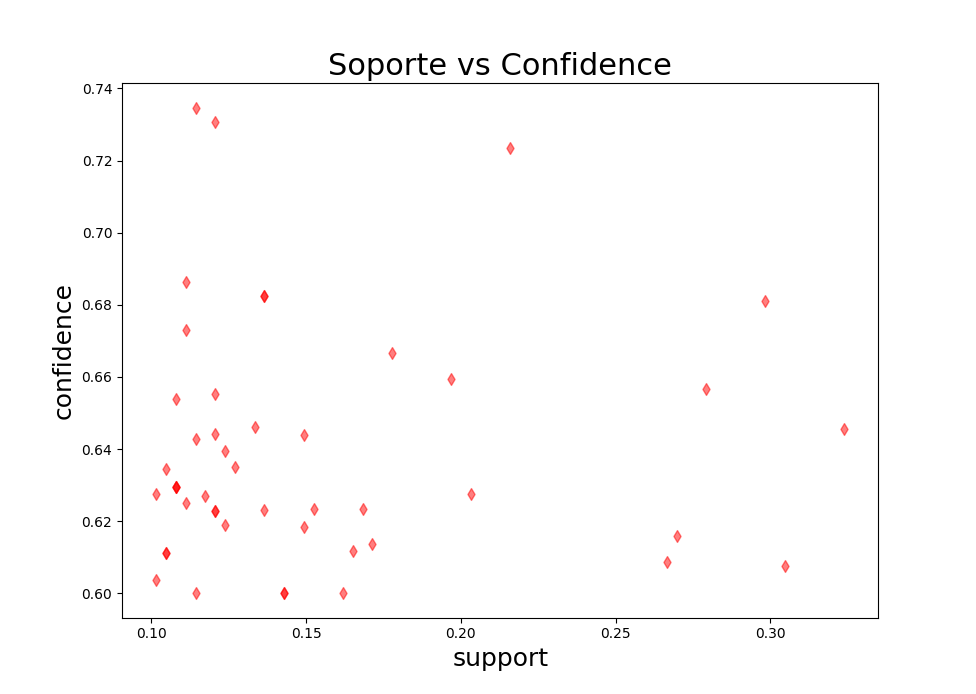

Text(0.5, 1.0, 'Soporte vs Confidence')

In [45]:
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(rules['support'], rules["confidence"], color="red", marker="d", alpha=0.5)
ax.set_xlabel('support', fontsize=18)
ax.set_ylabel("confidence", fontsize=18)
ax.set_title("Soporte vs Confidence", fontsize=22)